<a href="https://colab.research.google.com/github/hanahh080601/Colab/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
data = pd.read_csv('Iris.csv')
data = df.iloc[:100,]
data = data[['SepalLengthCm', 'PetalLengthCm', 'Species']]
petal_len = np.array(data['SepalLengthCm']).reshape(100,1)
petal_wid = np.array(data['PetalLengthCm']).reshape(100,1)
x = np.hstack((petal_len, petal_wid))

def species_to_num(name):
    if name == 'Iris-setosa':
        return -1
    else:
        return 1

species = data.apply(lambda x: species_to_num(x['Species']),axis=1)
y = np.array(species)
print("X shape: ", x.shape)
print("Y shape: ", y.shape)

X shape:  (100, 2)
Y shape:  (100,)


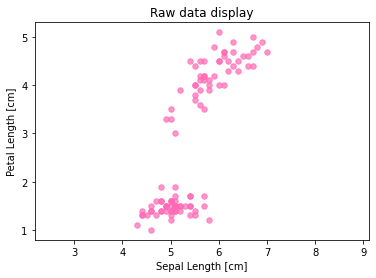

In [ ]:
plt.scatter(petal_len, petal_wid, color = 'hotpink', s=30, alpha = .7)
plt.title('Raw data display')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.axis('equal')
plt.show()

[-0.0034  0.0091] [-0.002]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


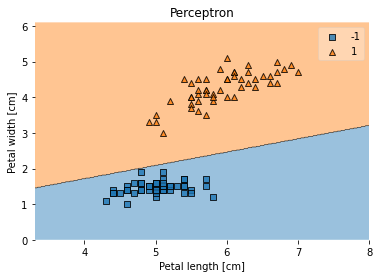

In [ ]:
class Perceptron:
  def __init__(self, lr = 0.001, epoch = 1000):
    self.w = None
    self.bias = None
    self.lr = lr
    self.epoch = epoch

  def assign_label(self, x):
    return np.where(x >= 0, 1, 0)

  def predict(self, x):
    y_ = np.dot(x, self.w) + self.bias
    y_ = self.assign_label(y_)
    return y_ 

  def has_covered(self, x, y):
    return np.array_equal(self.predict(x), y)

  def fit(self, x, y):
    n,m = x.shape
    self.w = np.zeros(m)
    self.bias = 0
    y_sample = np.where(y > 0, 1, 0).reshape(100,1)
    for i in range(self.epoch):
      for index, x_i in enumerate(x):
        y_pred = self.predict(x_i)
        delta = self.lr * (y_sample[index] - y_pred)
        self.w += delta * x_i
        self.bias += delta 
      #if (self.has_covered(x, y)):
        #break
    return self

PP = Perceptron()
result = PP.fit(x, y)
print(result.w, result.bias)
plot_decision_regions(x, y, clf=result) 
plt.title('Perceptron')
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.show()    
